In [1]:
import admix
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# specify parameters
N_INDIV = 10000
STEP = 25

In [3]:
CHROM = 1
KG_PATH = f"/u/project/pasaniuc/kangchen/DATA/plink2-1kg/out/build38.chr{CHROM}"

df_regions = pd.read_csv(
    "../02-region-locus-simulate/out/regions.txt", delim_whitespace=True
)
region_i = 0

In [4]:
REGION_START = 1848336
REGION_STOP = 3848336

In [5]:

ref_dset = admix.io.read_dataset(KG_PATH)
ref_dset = ref_dset[
    (
        (ref_dset.snp.CHROM == df_regions.CHROM[region_i])
        & (
            ref_dset.snp.POS.between(
                REGION_START, REGION_STOP
            )
        )
    ).values
]
ref_dset = ref_dset[0::STEP]
ref_dset_list = [
    ref_dset[:, (ref_dset.indiv.SuperPop == pop).values] for pop in ["EUR", "AFR"]
]

mosaic_size = admix.simulate.calculate_mosaic_size(
    df_snp=ref_dset.snp, genetic_map="hg38", chrom=1, n_gen=7
)

np.random.seed(1)
dset, lanc = admix.simulate.admix_geno(
    geno_list=[dset.geno for dset in ref_dset_list],
    df_snp=ref_dset.snp,
    anc_props=[0.2, 0.8],
    mosaic_size=mosaic_size,
    n_indiv=N_INDIV,
    return_sparse_lanc=True,
)
dset.snp[["FREQ1", "FREQ2"]] = dset.af_per_anc()
dset = dset[(dset.snp.FREQ1.between(0.01, 0.99) & dset.snp.FREQ2.between(0.01, 0.99)).values]

admix.data.af_per_anc: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


In [6]:
ld = np.corrcoef(dset.geno.sum(axis=2)).compute()

<AxesSubplot:>

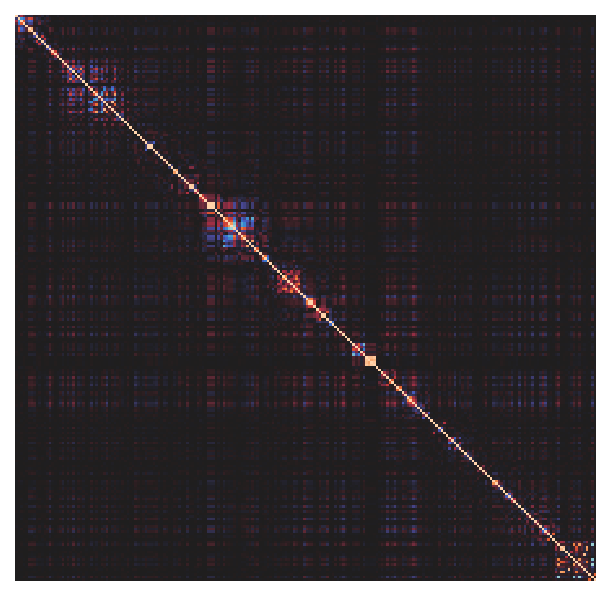

In [7]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
sns.heatmap(ld, center=0, vmin=-1, vmax=1, ax=ax, cbar=False, xticklabels=False, yticklabels=False)

In [8]:
DATA_ROOT_DIR = (
    "/u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01-dataset/out/aframr"
)
CHROM = 1

In [9]:
pfile = f"{DATA_ROOT_DIR}/imputed/chr{CHROM}"

# read data
dset = admix.io.read_dataset(pfile, snp_chunk=1024)

# simulate effects
dset = dset[
    (
        dset.snp.EUR_FREQ.between(0.005, 0.995)
        & dset.snp.AFR_FREQ.between(0.005, 0.995)
        & (REGION_START < dset.snp.POS)
        & (dset.snp.POS <= REGION_STOP)
    ).values
]

2022-01-21 16:52.04 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01-dataset/out/aframr/imputed/chr1.lanc
2022-01-21 16:52.12 [info     ] admix.Dataset: `n_anc` is not provided, infered n_anc from the first 1,000 SNPs is 2. If this is not correct, provide `n_anc` when constructing admix.Dataset


In [10]:
dset = dset[0::STEP]

In [11]:
ld = np.corrcoef(dset.geno.sum(axis=2)).compute()

/u/project/pasaniuc/kangchen/software/miniconda3/lib/python3.8/site-packages/dask/array/routines.py:308: PerformanceWarning: Increasing number of chunks by factor of 15
  intermediate = blockwise(


<AxesSubplot:>

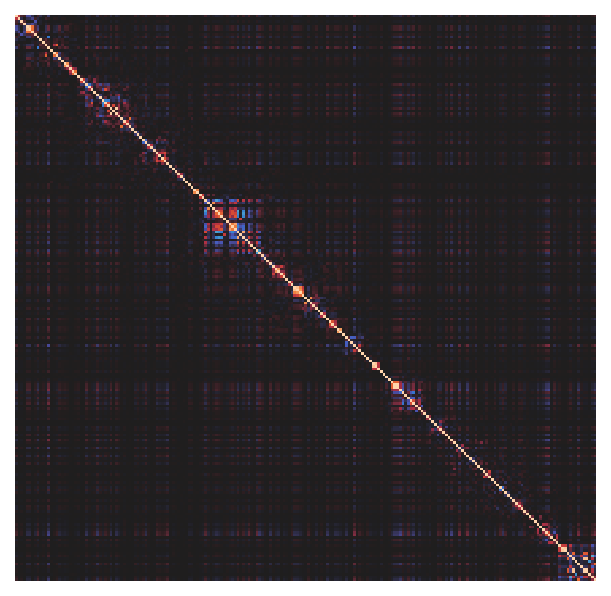

In [12]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
sns.heatmap(ld, center=0, vmin=-1, vmax=1, ax=ax, cbar=False, xticklabels=False, yticklabels=False)

In [16]:
dset = admix.io.read_dataset("/u/project/pasaniuc/kangchen/2021-admix-corr/experiments/02-sample-size-simulate/out/datasets/region0_20_80")

2022-01-21 16:55.24 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/kangchen/2021-admix-corr/experiments/02-sample-size-simulate/out/datasets/region0_20_80.lanc
2022-01-21 16:55.26 [info     ] admix.Dataset: `n_anc` is not provided, infered n_anc from the first 1,000 SNPs is 2. If this is not correct, provide `n_anc` when constructing admix.Dataset


In [17]:
dset = dset[
    (
        dset.snp.EUR_FREQ.between(0.005, 0.995)
        & dset.snp.AFR_FREQ.between(0.005, 0.995)
        & (REGION_START < dset.snp.POS)
        & (dset.snp.POS <= REGION_STOP)
    ).values
]
dset = dset[0::STEP]

In [18]:
ld = np.corrcoef(dset.geno.sum(axis=2)).compute()

/u/project/pasaniuc/kangchen/software/miniconda3/lib/python3.8/site-packages/dask/array/routines.py:308: PerformanceWarning: Increasing number of chunks by factor of 11
  intermediate = blockwise(


<AxesSubplot:>

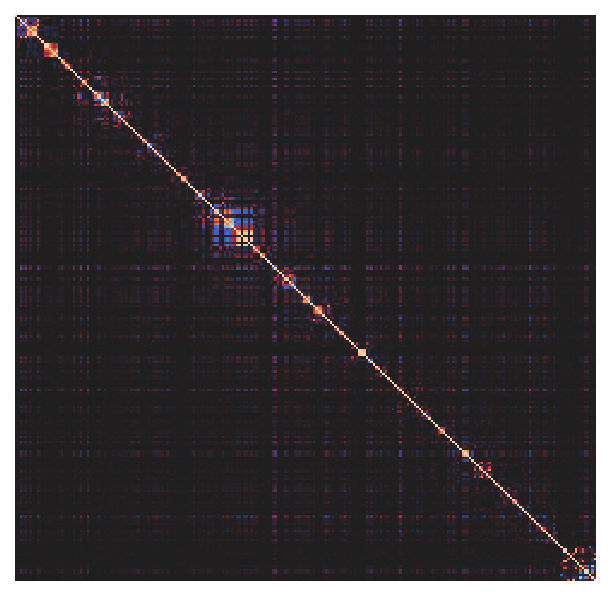

In [19]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
sns.heatmap(ld, center=0, vmin=-1, vmax=1, ax=ax, cbar=False, xticklabels=False, yticklabels=False)